### Part 2. HW  
**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  
**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
  
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) \textbf{Beta} distribution으로 위의 \textbf{belief}을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 

### 문제 1번

In [6]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

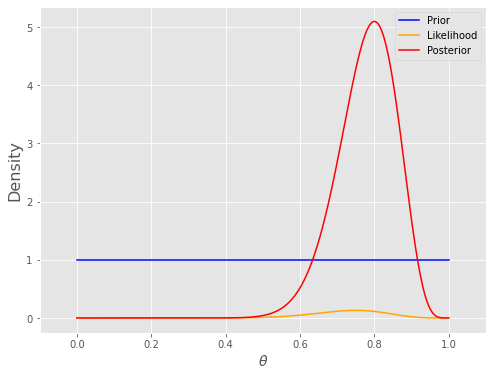

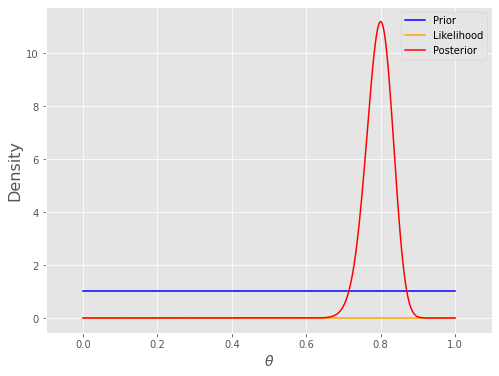

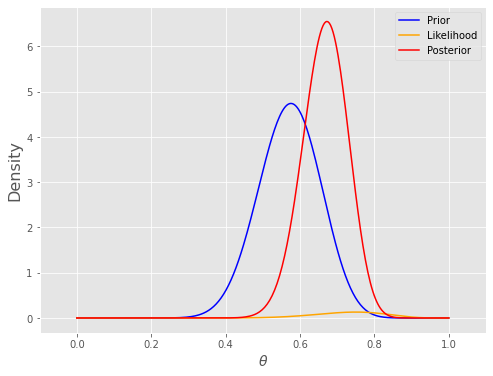

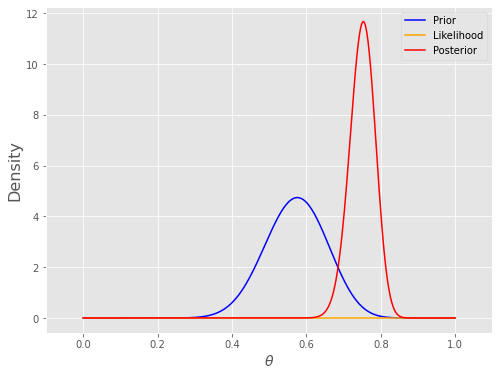

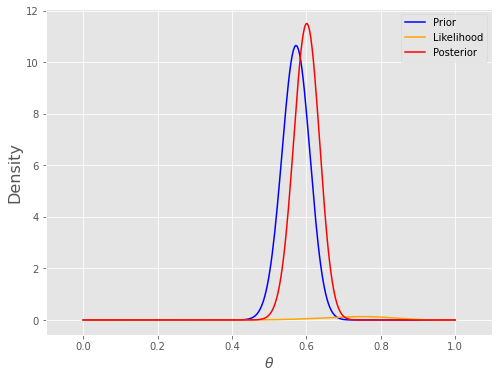

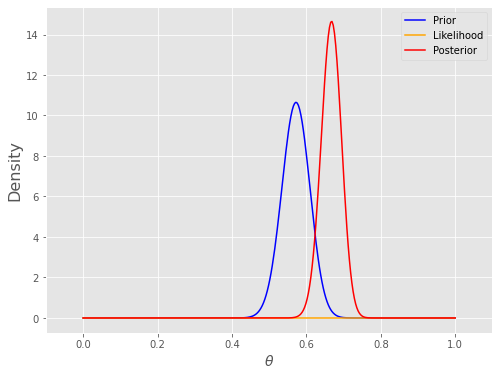

In [7]:
# Likelihood
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

# Prior
def posterior(a0, b0, n, y):
    prior = st.beta(a=a0, b=b0)
    post=st.beta(a=a0+n, b=b0+(n-y))    
    thetas=np.linspace(0, 1, 300)
    plt.figure(figsize=(8,6))
    plt.style.use('ggplot')
    plt.plot(thetas,prior.pdf(thetas), label='Prior', c='blue')
    plt.plot(thetas, (10**4)*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

# plotting
posterior(1, 1, 20, 15)
posterior(1, 1, 100, 75)
posterior(20, 15, 20, 15)
posterior(20, 15, 100, 75)
posterior(100, 75, 20, 15)
posterior(100, 75, 100, 75)

### 문제 2번

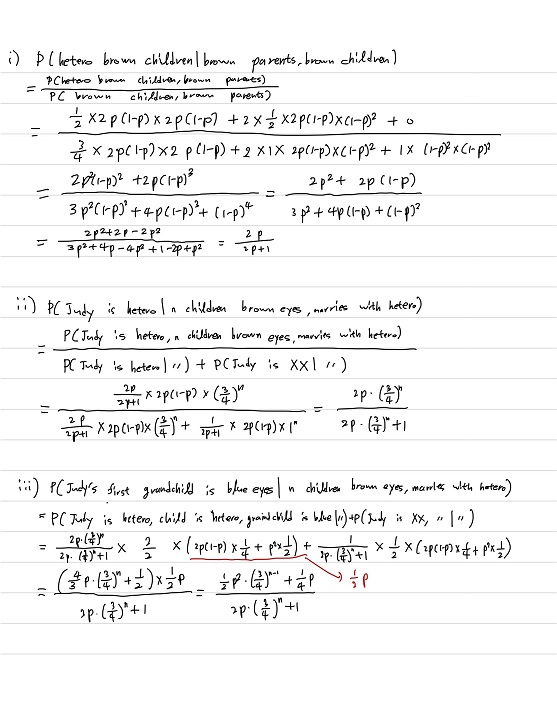

### 문제 3번

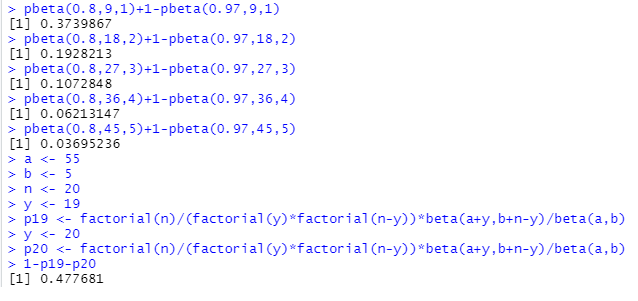

1) 0.8 미만이거나 0.97 초과일 것 같지 않다고 생각한다에서 이 확률이 0.05보다 낮다를 기준으로 하고 싶으므로 위의 R코드에서 alpha=45, beta=5로 설정하였다.

2) 10명의 환자가 모두 성공하였으므로 posterior는 beta(45+10, 5+10-10)=beta(55,5)를 따른다.

3) 다음 환자가 생존할 확률은 사후평균의 값과 같으므로 55/(55+5)=0.9166666667
   
   사후분포가 beta(a,b)일 때 다음 n명의 환자 중 y명이 생존할 확률은 factorial(n)/(factorial(y)*factorial(n-y))*beta(a+y,b+n-y)/beta(a,b)이므로 다음 20명의 환자 중 2명 이상이 사망할 확률은 0명이 사망할 확률, 즉 20명 전원이 생존할 확률과 1명이 사망할 확률, 즉 19명이 생존할 확률을 1에서 빼주면 된다. R을 통해 계산한 결과는 0.477681이다.